<a href="https://colab.research.google.com/github/AbhyanandSharma2005/ML-model-practice-on-real-data/blob/main/KNN%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Generating Synthetic Data ---
Dataset shape: X=(300, 2), y=(300,)
Class distribution: Counter({np.int64(0): 150, np.int64(1): 150})
Training samples: 225, Test samples: 75
Training class distribution: Counter({np.int64(1): 113, np.int64(0): 112})
Test class distribution: Counter({np.int64(0): 38, np.int64(1): 37})

Features scaled successfully.

--- Initializing and 'Training' KNN Model ---
KNN model initialized with k=5. Data stored for prediction.

--- Evaluating Model Performance ---
Accuracy on test set: 0.9867

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75


--- Plotting Decision Boundary (for 2D data) ---


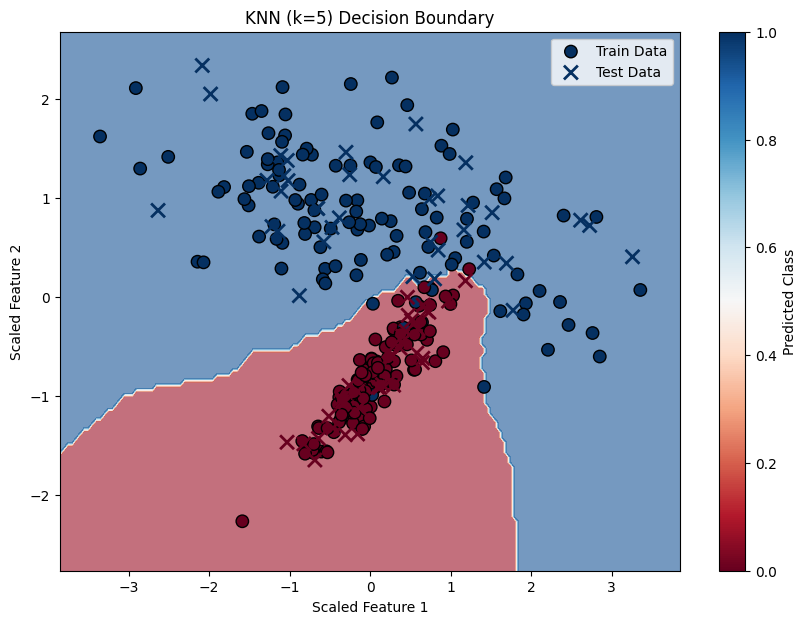

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification # For generating synthetic data

# --- 1. KNN Model Implementation (From Scratch) ---

class KNNClassifier:
    def __init__(self, k=3):
        """
        Initializes the K-Nearest Neighbors Classifier.

        Args:
            k (int): The number of nearest neighbors to consider.
        """
        if not isinstance(k, int) or k <= 0:
            raise ValueError("k must be a positive integer.")
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        "Trains" the KNN model. In KNN, training simply involves storing the data.

        Args:
            X (numpy.ndarray): Training features, shape (n_samples, n_features).
            y (numpy.ndarray): Target labels, shape (n_samples,).
        """
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        """
        Calculates the Euclidean distance between two data points.
        """
        return np.sqrt(np.sum((x1 - x2)**2))

    def _predict_single_sample(self, x_new):
        """
        Predicts the class label for a single new data point.
        """
        distances = []
        for i in range(len(self.X_train)):
            dist = self._euclidean_distance(x_new, self.X_train[i])
            distances.append((dist, self.y_train[i])) # Store (distance, label) tuple

        # Sort by distance and get the k nearest neighbors
        distances.sort(key=lambda x: x[0]) # Sort by the distance (first element of tuple)
        k_nearest_neighbors = distances[:self.k]

        # Extract the labels of the k nearest neighbors
        k_neighbor_labels = [label for dist, label in k_nearest_neighbors]

        # Determine the most common label among the k neighbors
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0] # Return the label with the highest count

    def predict(self, X):
        """
        Predicts class labels for multiple new data points.

        Args:
            X (numpy.ndarray): New samples for prediction, shape (n_samples, n_features).

        Returns:
            numpy.ndarray: Predicted class labels, shape (n_samples,).
        """
        predictions = [self._predict_single_sample(x) for x in X]
        return np.array(predictions)

# --- 2. Data Generation ---

def generate_synthetic_data(n_samples=300, n_features=2, n_classes=2, random_state=42):
    """
    Generates a synthetic classification dataset.
    """
    X, y = make_classification(n_samples=n_samples, n_features=n_features,
                               n_informative=n_features, n_redundant=0,
                               n_clusters_per_class=1, n_classes=n_classes,
                               random_state=random_state)
    return X, y

# --- 3. Main Execution Block ---

if __name__ == "__main__":
    # --- A. Generate and Prepare Data ---
    print("--- Generating Synthetic Data ---")
    X, y = generate_synthetic_data(n_samples=300, n_features=2, n_classes=2, random_state=42)

    print(f"Dataset shape: X={X.shape}, y={y.shape}")
    print(f"Class distribution: {Counter(y)}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
    print(f"Training class distribution: {Counter(y_train)}")
    print(f"Test class distribution: {Counter(y_test)}")

    # Feature Scaling (CRUCIAL for KNN!)
    # StandardScaler transforms data to have a mean of 0 and a standard deviation of 1.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("\nFeatures scaled successfully.")

    # --- B. Initialize and "Train" the Model ---
    print("\n--- Initializing and 'Training' KNN Model ---")
    # Experiment with different values for k (e.g., 1, 3, 5, 7, 9)
    # k is often chosen as an odd number to avoid ties in binary classification
    knn_model = KNNClassifier(k=5)
    knn_model.fit(X_train_scaled, y_train) # KNN training is just storing the data
    print(f"KNN model initialized with k={knn_model.k}. Data stored for prediction.")

    # --- C. Evaluate the Model ---
    print("\n--- Evaluating Model Performance ---")
    y_pred = knn_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # --- D. Visualization (for 2D data) ---
    print("\n--- Plotting Decision Boundary (for 2D data) ---")

    plt.figure(figsize=(10, 7))
    ax = plt.gca()

    # Create a meshgrid for plotting decision boundary
    x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
    y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), # Reduced step for faster plotting
                         np.arange(y_min, y_max, 0.05))

    # Predict classes for each point in the meshgrid
    # This can be slow for large grids/datasets due to KNN's lazy nature
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision regions
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.RdBu)

    # Plot the training points
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k', s=80, label='Train Data')

    # Plot the test points
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', s=100, linewidth=2, label='Test Data')

    plt.title(f'KNN (k={knn_model.k}) Decision Boundary')
    plt.xlabel('Scaled Feature 1')
    plt.ylabel('Scaled Feature 2')
    plt.colorbar(label='Predicted Class')
    plt.legend()
    plt.show()